In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras import models, layers
import tensorflow.keras.datasets as tfds

In [2]:
# MNIST
inp = layers.Input(shape=(28, 28))
x = layers.Flatten()(inp)
x = layers.Dense(128, activation=keras.activations.relu)(x)
x = layers.Dense(10, activation=keras.activations.softmax)(x)
model = models.Model(inputs=inp, outputs=x)

(x_train, y_train), (x_test, y_test) = tfds.mnist.load_data()
x_train = x_train / 255.
x_test  = x_test / 255.
# y_train = keras.utils.to_categorical(y_train)
# y_test  = keras.utils.to_categorical(y_test)

# model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=["acc"])

# or
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.sparse_categorical_crossentropy, metrics=["acc"])

model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    validation_batch_size=32
)

Epoch 1/5
1875/1875 [==============================] - 36s 12ms/step - loss: 0.2554 - acc: 0.9276 - val_loss: 0.1380 - val_acc: 0.9570
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1132 - acc: 0.9657 - val_loss: 0.1043 - val_acc: 0.9667
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0778 - acc: 0.9770 - val_loss: 0.0733 - val_acc: 0.9776
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0597 - acc: 0.9814 - val_loss: 0.0792 - val_acc: 0.9758
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0748 - val_acc: 0.9767


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 128)          1152        ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 128)          16512       ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           8256        ['dense_3[0][0]']                
                                                                                            

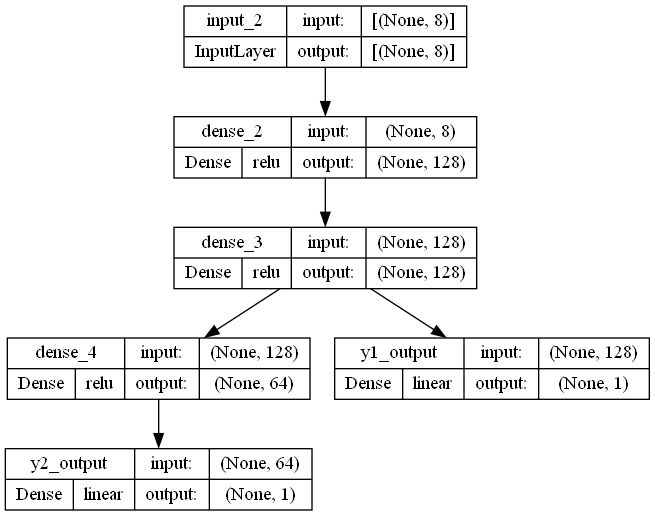

In [3]:
from keras.utils import plot_model


inp = layers.Input(shape=(8,))
dense1 = layers.Dense(128, activation=tf.nn.relu)(inp)
dense2 = layers.Dense(128, activation=tf.keras.activations.relu)(dense1)
y1_output = layers.Dense(1, name="y1_output")(dense2)
dense3 = layers.Dense(64, activation=tf.keras.activations.relu)(dense2)
y2_output = layers.Dense(1, name="y2_output")(dense3)
model = models.Model(inputs=inp, outputs=[y1_output, y2_output])

model.summary()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss={"y1_output": keras.losses.mse, "y2_output": keras.losses.mse},
             metrics={
                 "y1_output": tf.keras.metrics.RootMeanSquaredError(),
                 "y2_output": tf.keras.metrics.RootMeanSquaredError()})

plot_model(model, show_shapes=True, show_layer_activations=True)

(119980, 2, 28, 28) (119980,)


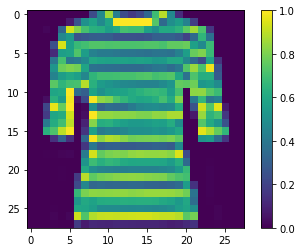

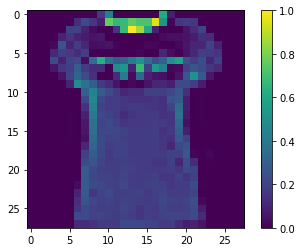

1.0
Epoch 1/20
938/938 [==============================] - 34s 21ms/step - loss: 0.1105 - val_loss: 0.0856
Epoch 2/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0786 - val_loss: 0.0725
Epoch 3/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0702 - val_loss: 0.0698
Epoch 4/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0656 - val_loss: 0.0671
Epoch 5/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0624 - val_loss: 0.0655
Epoch 6/20
938/938 [==============================] - 16s 18ms/step - loss: 0.0603 - val_loss: 0.0661
Epoch 7/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0583 - val_loss: 0.0639
Epoch 8/20
938/938 [==============================] - 17s 18ms/step - loss: 0.0571 - val_loss: 0.0649
Epoch 9/20
938/938 [==============================] - 17s 19ms/step - loss: 0.0562 - val_loss: 0.0672
Epoch 10/20
938/938 [==============================] - 17s 18ms/step - loss: 0

In [4]:
import random

def create_pairs(x, digit_indices):
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[dn][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

def create_pairs_on_set(images, labels):
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype("float32")
    return pairs, y

(train_images, train_labels), (test_images, test_labels) = tfds.fashion_mnist.load_data()

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255.0
test_images /= 255.0

tr_paires, tr_y = create_pairs_on_set(train_images, train_labels)
ts_paires, ts_y = create_pairs_on_set(test_images, test_labels)
print(tr_paires.shape, tr_y.shape)

def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

this_pair = 10
show_image(tr_paires[this_pair][0])
show_image(tr_paires[this_pair][1])
print(tr_y[this_pair])

def initialize_base_network():
    inp = layers.Input(shape=(28, 28, ))
    x = layers.Flatten()(inp)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation="relu")(x)
    return models.Model(inputs=inp, outputs=x)

def eculidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def ecul_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True)

input_a = layers.Input(shape=(28, 28, ), name="left_input")
input_b = layers.Input(shape=(28, 28, ), name="right_input")

vect_output_a = base_network(input_a)
vect_output_b = base_network(input_b)

output = layers.Lambda(eculidean_distance, output_shape=ecul_dist_output_shape, name="output_layer")([vect_output_a, vect_output_b])
model = models.Model(inputs=[input_a, input_b], outputs=output)

plot_model(model, show_shapes=True, show_layer_names=True)

def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

rms = keras.optimizers.RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_paires[:, 0], tr_paires[:, 1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_paires[:, 0], ts_paires[:, 1]], ts_y))
loss = model.evaluate(x=[ts_paires[:, 0], ts_paires[:, 1]], y=ts_y)

In [5]:
class ContrastiveLoss(keras.losses.Loss):
    def __init__(self, marigin=0):
        super().__init__()
        self.marigin = marigin
    
    def call(self, y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(self.margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def my_relu(x):
    return K.maximum(0.5, x)

my_lambda1 = layers.Lambda(my_relu)
my_lambda2 = layers.Lambda(lambda x: K.abs(x))

In [31]:
# class SimpleDense(layers.Layer):
    
#     def __init__(self, units=32):
#         super(SimpleDense, self).__init__()
#         self.units = units
    
#     def build(self,  input_shape):
#         w_init = tf.random_normal_initializer()
#         self.w = tf.Variable(name="kernel",
#                             initial_value=w_init(shape=(input_shape[-1], self.units), dtype="float32"),
#                             trainable=True)
        
#         b_init = tf.zeros_initializer()
#         self.b = tf.Variable(name="bias",
#                             initial_value=b_init(shape=(self.units, ), dtype="float32"),
#                             trainable=True)
    
#     def call(self, inputs):
#         return tf.matmul(inputs, self.w) + self.b

class SimpleDense(layers.Layer):

    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        super().build(input_shape)
    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

In [32]:
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((1, 1))
y = my_dense(x)

# parameters of the base Layer class like `variables` can be used
print(my_dense.variables)

[<tf.Variable 'simple_dense_17/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.0417685]], dtype=float32)>, <tf.Variable 'simple_dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [33]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1, inp)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

ValueError: in user code:

    File "C:\Program Files\Python38\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Program Files\Python38\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Program Files\Python38\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Program Files\Python38\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Program Files\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\amirr\AppData\Local\Temp\ipykernel_6064\3143963372.py", line 33, in build
        initial_value=w_init(shape=(input_shape[-1], self.units),

    ValueError: Exception encountered when calling layer "sequential_9" (type Sequential).
    
    Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.
    
    Call arguments received by layer "sequential_9" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
